<a href="https://colab.research.google.com/github/nikitius20/ML_test/blob/main/powerr_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.model_selection import train_test_split

In [ ]:
class PowerModel(nn.Module):
  def __init__(self, in_features=1, out_features=1):
    super().__init__()
    #create a new parametr what represents N in y=x^n. And because this is parametr, it is learnable
    self.power = nn.Parameter(max(torch.tensor([0.]),torch.randn(in_features, out_features))) # to stop 'inf' error if power was < 0

  def forward(self, input):


    #print(self.power)     !!trying to set up range [1, 3], but unsuccessful

    #print(self.power<1)
    #self.power = nn.Parameter(torch.clamp(self.power, min=1, max=3)) this dont work right

    #if(self.power<1):
      #print("power changed")
      #self.power = nn.Parameter(torch.tensor([1.]));
    #elif(self.power>3):
      #self.power = nn.Parameter(torch.tensor([3.]));

    return torch.pow(input, self.power)   #y=x^n

In [ ]:
#generate a dataset of random numbers, using N for power

import random

list_x = []
list_y = []

power = 2.4  # power value

for x in range(8):
  row_list_x =[]
  row_list_y =[]
  for y in range(16):
    r = random.randint(0,100);
    row_list_x.append(r)
    row_list_y.append(pow(r,power))


  list_x.append(row_list_x)
  list_y.append(row_list_y)

print(list_x)
print(list_y)


x = list_x
y = list_y

[[67, 4, 36, 65, 42, 43, 26, 75, 20, 80, 60, 37, 97, 61, 6, 59], [59, 51, 99, 23, 56, 84, 40, 25, 77, 53, 100, 7, 85, 88, 19, 30], [88, 9, 95, 69, 25, 65, 68, 67, 83, 62, 44, 100, 80, 68, 99, 21], [42, 32, 2, 96, 91, 19, 17, 23, 30, 58, 21, 34, 73, 63, 1, 59], [85, 98, 21, 17, 25, 28, 88, 82, 84, 81, 46, 30, 73, 88, 43, 23], [58, 69, 67, 64, 34, 86, 11, 57, 18, 32, 87, 34, 58, 5, 64, 28], [44, 77, 14, 73, 66, 5, 39, 100, 87, 48, 6, 98, 94, 2, 80, 80], [82, 74, 27, 97, 50, 10, 96, 50, 56, 98, 97, 92, 17, 40, 94, 44]]
[[24131.2337482305, 27.85761802547597, 5434.079675567798, 22438.408793671777, 7866.803402593006, 8323.850919752134, 2488.490775030509, 31633.484432121404, 1325.7816069359944, 36933.117591224654, 18516.674868318143, 5803.421813090341, 58647.85898132894, 19266.002132715064, 73.71621039885189, 17784.62973778223], [17784.62973778223, 12536.272466684604, 61592.02274994129, 1854.1582866376455, 15691.023210227366, 41521.23728886637, 6997.517273236977, 2264.936448992798, 33695.9527

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

x_train = torch.FloatTensor(x_train);
x_test = torch.FloatTensor(x_test);


y_train = torch.FloatTensor(y_train);
y_test = torch.FloatTensor(y_test);


In [ ]:
model = PowerModel()

criterian = nn.MSELoss();

optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

Epoch: 0, and loss: 950885248.0
Epoch: 10, and loss: 950516416.0
Epoch: 20, and loss: 946804352.0
Epoch: 30, and loss: 899905152.0
Epoch: 40, and loss: 278233664.0
Epoch: 50, and loss: 37472184.0
Epoch: 60, and loss: 5803240.0
Epoch: 70, and loss: 13303305.0
Epoch: 80, and loss: 5822388.5
Epoch: 90, and loss: 1013372.5625
Epoch: 100, and loss: 16176.083984375
Epoch: 110, and loss: 208239.359375
Epoch: 120, and loss: 69075.6796875
Epoch: 130, and loss: 899.3057861328125
Epoch: 140, and loss: 11929.890625
Epoch: 150, and loss: 666.5092163085938
Epoch: 160, and loss: 1124.622314453125
Epoch: 170, and loss: 186.5859832763672
Epoch: 180, and loss: 128.99623107910156
Epoch: 190, and loss: 18.435699462890625


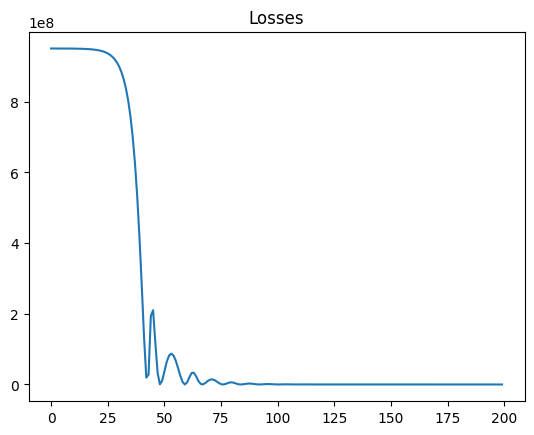

In [ ]:
epoch = 200

losses = []

for i in range(epoch):

  y_pred = model.forward(x_train);

  loss = criterian(y_pred, y_train);
  losses.append(loss.detach().numpy())
  if(i%10==0):
    print(f'Epoch: {i}, and loss: {loss}');


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(losses)
plt.title('Losses')
plt.show()

In [ ]:
model.forward(x_test)

tensor([[7.8658e+03, 4.0955e+03, 5.2779e+00, 5.7199e+04, 5.0308e+04, 1.1721e+03,
         8.9750e+02, 1.8540e+03, 3.5079e+03, 1.7067e+04, 1.4903e+03, 4.7369e+03,
         2.9642e+04, 2.0814e+04, 1.0000e+00, 1.7782e+04]],
       grad_fn=<PowBackward1>)

In [ ]:
x_test

tensor([[42., 32.,  2., 96., 91., 19., 17., 23., 30., 58., 21., 34., 73., 63.,
          1., 59.]])

In [ ]:
y_test

tensor([[7.8668e+03, 4.0960e+03, 5.2780e+00, 5.7207e+04, 5.0315e+04, 1.1722e+03,
         8.9759e+02, 1.8542e+03, 3.5083e+03, 1.7070e+04, 1.4905e+03, 4.7375e+03,
         2.9647e+04, 2.0817e+04, 1.0000e+00, 1.7785e+04]])

In [ ]:
#predicted power value

model.state_dict()['power']

tensor([2.4000])